In [174]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

In [175]:
Car_mpg = pd.read_csv('cars-dataset.csv')
Car_mpg.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [176]:
Car_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [177]:
Car_mpg.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [178]:
Car_mpg['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148', '129',
       '96', '71', '98', '115', '53', '81', '79', '120', '152', '102',
       '108', '68', '58', '149', '89', '63', '48', '66', '139', '103',
       '125', '133', '138', '135', '142', '77', '62', '132', '84', '64',
       '74', '116', '82'], dtype=object)

In [179]:
# No missing values found. So let us try to remove ? from hp column

# Get count of rows having ?
freq =Car_mpg['hp'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)


     hp  count      prop
0   150     22  0.055276
1    90     20  0.050251
2    88     19  0.047739
3   110     18  0.045226
4   100     17  0.042714
5    95     14  0.035176
6    75     14  0.035176
7   105     12  0.030151
8    67     12  0.030151
9    70     12  0.030151
10   65     10  0.025126
11   97      9  0.022613
12   85      9  0.022613
13   80      7  0.017588
14  140      7  0.017588
15  145      7  0.017588
16   68      6  0.015075
17   72      6  0.015075
18    ?      6  0.015075
19   78      6  0.015075
20   92      6  0.015075
21   84      6  0.015075
22  170      5  0.012563
23  115      5  0.012563
24   86      5  0.012563
25   71      5  0.012563
26  175      5  0.012563
27   60      5  0.012563
28  180      5  0.012563
29  130      5  0.012563
..  ...    ...       ...
64  220      1  0.002513
65  142      1  0.002513
66  230      1  0.002513
67  138      1  0.002513
68  103      1  0.002513
69   61      1  0.002513
70  108      1  0.002513
71   77      1  0.002513


In [180]:
Car_mpg = Car_mpg.replace('?',np.nan)
Car_mpg[['hp']] = Car_mpg[['hp']].astype('float64')

In [181]:
Car_mpg['hp'].unique()

array([ 130.,  165.,  150.,  140.,  198.,  220.,  215.,  225.,  190.,
        170.,  160.,   95.,   97.,   85.,   88.,   46.,   87.,   90.,
        113.,  200.,  210.,  193.,   nan,  100.,  105.,  175.,  153.,
        180.,  110.,   72.,   86.,   70.,   76.,   65.,   69.,   60.,
         80.,   54.,  208.,  155.,  112.,   92.,  145.,  137.,  158.,
        167.,   94.,  107.,  230.,   49.,   75.,   91.,  122.,   67.,
         83.,   78.,   52.,   61.,   93.,  148.,  129.,   96.,   71.,
         98.,  115.,   53.,   81.,   79.,  120.,  152.,  102.,  108.,
         68.,   58.,  149.,   89.,   63.,   48.,   66.,  139.,  103.,
        125.,  133.,  138.,  135.,  142.,   77.,   62.,  132.,   84.,
         64.,   74.,  116.,   82.])

In [182]:
Car_mpg1 = Car_mpg.drop(["car name"],axis=1)
Car_mpg1 = Car_mpg1.drop(["yr"],axis=1)
Car_names = pd.DataFrame(Car_mpg[['car name']])
Car_mpg1.head(5)

,cyl,disp,hp,wt,acc,mpg
0,8,307.0,130.0,3504,12.0,18.0
1,8,350.0,165.0,3693,11.5,15.0
2,8,318.0,150.0,3436,11.0,18.0
3,8,304.0,150.0,3433,12.0,16.0
4,8,302.0,140.0,3449,10.5,17.0


In [183]:
Car_mpg1 = Car_mpg1.apply(lambda x: x.fillna(x.median()),axis=0)

In [184]:
Car_mpg1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


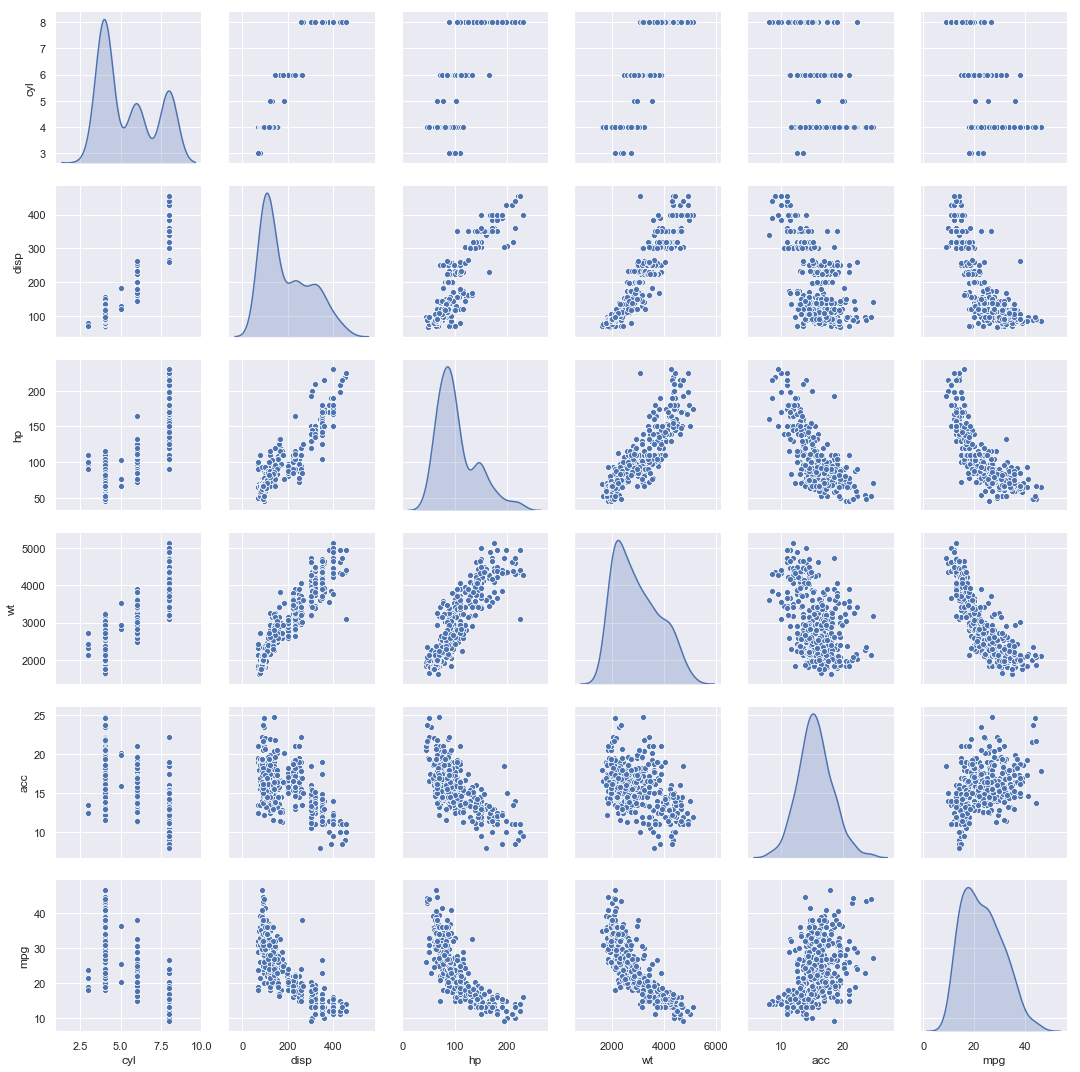

In [185]:
import seaborn as sns
sns.pairplot(Car_mpg1, diag_kind="kde")

In [186]:
from scipy.stats import zscore
num_cols = Car_mpg1
Carmpg_attributes = num_cols.apply(zscore)
Car_mpg1 = Carmpg_attributes.join(Car_names)
Car_mpg1.head()

,cyl,disp,hp,wt,acc,mpg,car name
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439,chevrolet chevelle malibu
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751,buick skylark 320
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439,plymouth satellite
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647,amc rebel sst
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543,ford torino


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

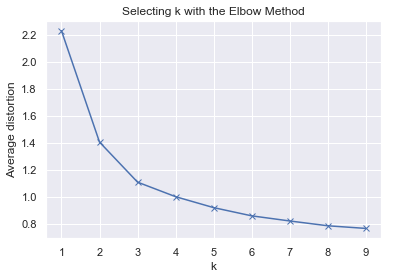

In [187]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Carmpg_attributes)
    prediction=model.predict(Carmpg_attributes)
    meanDistortions.append(sum(np.min(cdist(Carmpg_attributes, model.cluster_centers_, 'euclidean'), axis=1)) /Carmpg_attributes.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
                       
                                      

                               

In [ ]:
#### Looks like there are 4 or 3 good clusters###

In [188]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(Carmpg_attributes)
prediction=final_model.predict(Carmpg_attributes)

#Append the prediction 
Car_mpg1["GROUP"] = prediction
Car_mpg1.head(2)

,cyl,disp,hp,wt,acc,mpg,car name,GROUP
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439,chevrolet chevelle malibu,0
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751,buick skylark 320,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002249325DDD8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000022494B80518>]], dtype=object)

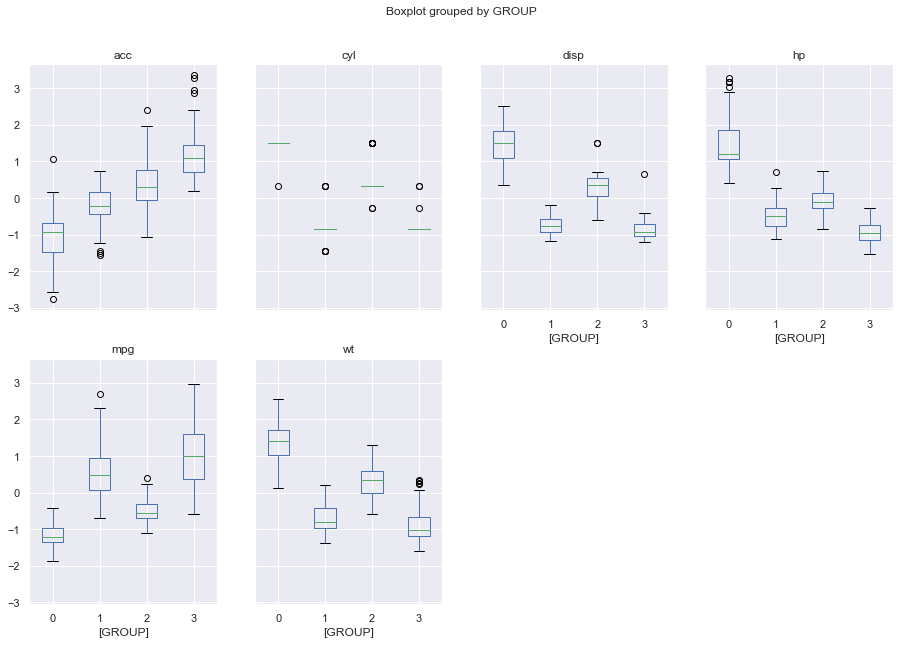

In [190]:
Car_mpg1.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [ ]:
# There are many outliers on each dimension  (indicated by the black circles)
# Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)

In [191]:
#### Outlier Treatment ####

data = Car_mpg1   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    mean, std = group.median(), group.std()
    outliers = (group - mean).abs() > 2*std
    group[outliers] = mean       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(Car_mpg1['GROUP']))

C:\Users\Ravichandra\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022490EFBEB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002249523B940>]], dtype=object)

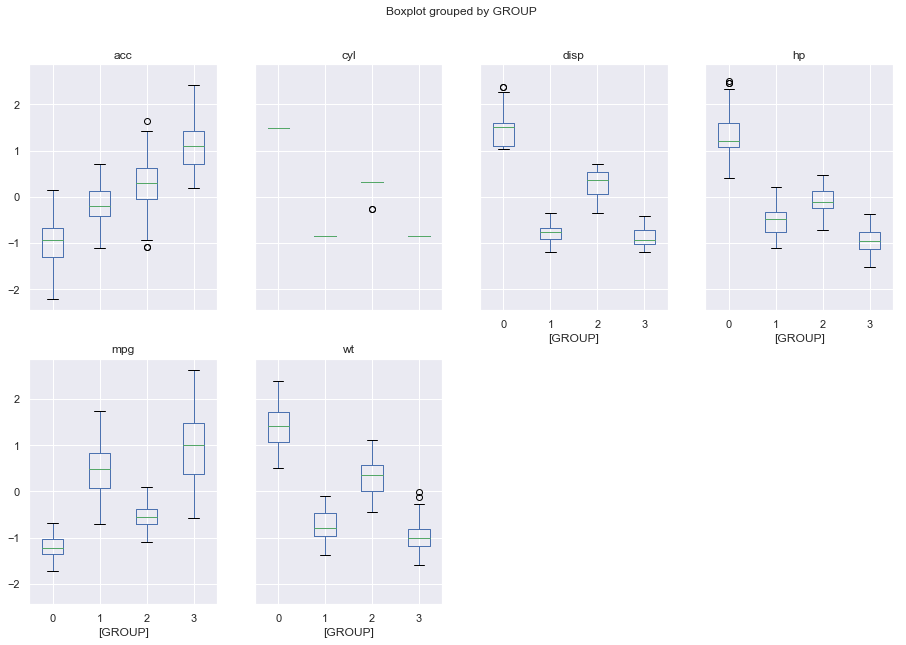

In [192]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

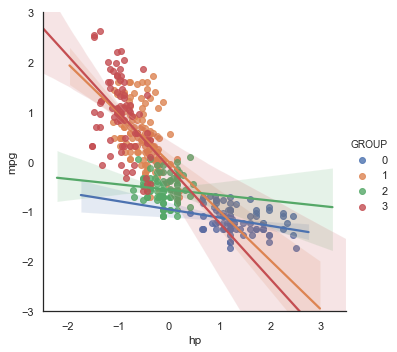

In [193]:
var = 'hp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

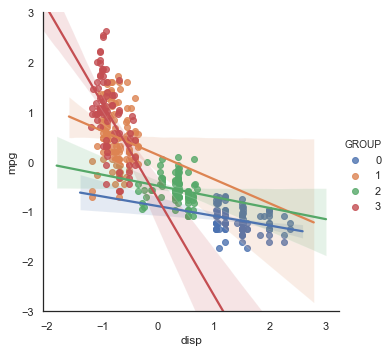

In [194]:
var = 'disp'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

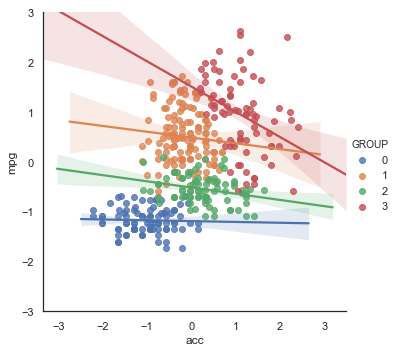

In [195]:
var = 'acc'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

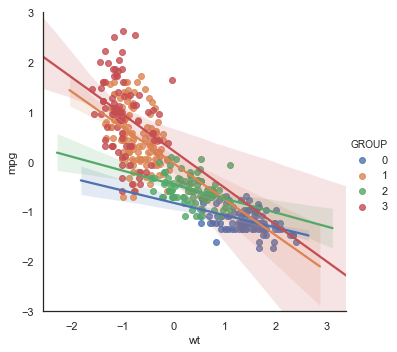

In [196]:
var = 'wt'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

In [216]:
# segregation of the data (group wise) and build individual models ###

Car_mpg1_group1 = Car_mpg1[Car_mpg1['GROUP']==0]
Car_mpg1_group1.head()

,cyl,disp,hp,wt,acc,mpg,car name,GROUP
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439,chevrolet chevelle malibu,0
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751,buick skylark 320,0
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439,plymouth satellite,0
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647,amc rebel sst,0
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543,ford torino,0


In [218]:
from sklearn.model_selection import train_test_split
array = Car_mpg1_group1.values
X = array[:,0:5] 
y = array[:,5]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_predicted = regression_model.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)


In [221]:
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-0.38594651  0.14322956 -0.25030629 -0.1941371  -0.0671942 ]
Intercept: -0.2186697685
Root mean squared error:  0.0554853985606
R2 score:  0.0874072537623


In [222]:
Car_mpg1_group2 = Car_mpg1[Car_mpg1['GROUP']==1]
Car_mpg1_group2.head()

,cyl,disp,hp,wt,acc,mpg,car name,GROUP
14,-0.856321,-0.772295,-0.243723,-0.707544,-0.206262,0.062185,toyota corona mark ii,1
18,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,0.446497,datsun pl510,1
20,-0.856321,-0.801103,-0.453287,-0.352841,0.701436,0.190289,peugeot 504,1
21,-0.856321,-0.829911,-0.374700,-0.638968,-0.387801,0.062185,audi 100 ls,1
22,-0.856321,-0.858718,-0.243723,-0.703997,0.701436,0.190289,saab 99e,1


In [223]:
from sklearn.model_selection import train_test_split
array = Car_mpg1_group2.values
X = array[:,0:5] 
y = array[:,5]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_predicted = regression_model.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)


In [225]:
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 0.59357943  0.48411135 -0.84501971 -0.38990573 -0.32992819]
Intercept: 0.668371816081
Root mean squared error:  0.265967508334
R2 score:  0.500945146745


In [226]:
Car_mpg1_group3 = Car_mpg1[Car_mpg1['GROUP']==2]
Car_mpg1_group3.head()

,cyl,disp,hp,wt,acc,mpg,car name,GROUP
15,0.320935,0.043923,-0.243723,-0.162483,-0.024722,-0.194023,plymouth duster,2
16,0.320935,0.053526,-0.191332,-0.232242,-0.024722,-0.706439,amc hornet,2
17,0.320935,0.063128,-0.505677,-0.453340,0.156817,-0.322127,ford maverick,2
24,0.320935,0.053526,-0.374700,-0.381217,-0.206262,-0.322127,amc gremlin,2
33,0.320935,0.370411,-0.112746,-0.397770,-0.932419,-0.578335,amc gremlin,2


In [227]:
from sklearn.model_selection import train_test_split
array = Car_mpg1_group3.values
X = array[:,0:5] 
y = array[:,5]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_predicted = regression_model.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)


In [229]:
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 0.40126263 -0.53785555  0.09913442 -0.22933028  0.04096974]
Intercept: -0.448418412426
Root mean squared error:  0.149528833214
R2 score:  -0.845028379228


In [230]:
Car_mpg1_group4 = Car_mpg1[Car_mpg1['GROUP']==3]
Car_mpg1_group4.head()

,cyl,disp,hp,wt,acc,mpg,car name,GROUP
19,-0.856321,-0.925936,-1.527300,-1.342463,1.790672,0.318393,volkswagen 1131 deluxe sedan,3
32,-0.856321,-0.916334,-0.283016,-1.092988,1.246054,0.190289,ford pinto,3
46,-0.856321,-0.513026,-0.846218,-0.664980,1.246054,-0.194023,chevrolet vega (sw),3
51,-0.856321,-1.098783,-0.898609,-1.059883,1.427593,0.830809,peugeot 304,3
53,-0.856321,-1.175603,-1.029586,-1.415768,1.246054,0.958913,toyota corolla 1200,3


In [231]:
from sklearn.model_selection import train_test_split
array = Car_mpg1_group4.values
X = array[:,0:5] 
y = array[:,5]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_predicted = regression_model.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [233]:
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 2.13007463 -1.06688909 -0.86453118  0.11693113 -0.20633766]
Intercept: 1.34613923145
Root mean squared error:  0.569045860425
R2 score:  0.0701384047366


In [238]:
#### linear regression model fit on full data set
from sklearn.model_selection import train_test_split
array = Car_mpg1.values
X = array[:,0:5] 
y = array[:,5]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [239]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_predicted = regression_model.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [240]:
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-0.07420423 -0.01346683 -0.23104822 -0.56572929 -0.02804332]
Intercept: -0.0110096484235
Root mean squared error:  0.241313962351
R2 score:  0.748494859198


In [251]:
### Using Polynomial Regression ###
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree= 2)
x_poly = polynomial_features.fit_transform(X_train)
x_test = polynomial_features.fit_transform(X_test)
regression_model = LinearRegression()
regression_model.fit(x_poly, y_train)
y_predicted = regression_model.predict(x_test)
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [252]:
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 0.          0.10975214 -0.45116441 -0.62110516 -0.19425167 -0.13579423
  0.03645565 -0.27763971  0.5366902  -0.09541968  0.22426194 -0.06893796
  0.07004812  0.52964423 -0.06437478 -0.12336641 -0.03038532 -0.07589118
 -0.2169184   0.00090721  0.05009425]
Intercept: -0.292156605198
Root mean squared error:  0.206150251251
R2 score:  0.785143605193


In [ ]:
### R2 Score is better with polynomial Regression #####